# Классификация IC50 превышает медианное значение

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Загрузка данных и разделение на выборки

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
target = 'IC50, mM'

In [92]:
df = pd.read_parquet("data/processed_data_full.parquet")

In [93]:
df["IC50_gt_median"] = (df[target] > df[target].median()).astype(int)

In [94]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,IC50_gt_median
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,6.239374,175.482382,28.125000,0
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,0.771831,5.402819,7.000000,0
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,223.808778,161.142320,0.720000,1
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.03167,-0.03167,-0.234453,-0.274647,3.119291,-0.084045,1.705624,107.855654,63.235294,0
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,107.131532,139.270991,1.300000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.000104,34.999650,1.129017,0
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.999934,33.999415,1.062484,0
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,30.999883,33.999458,1.096761,0
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.998959,32.999644,1.031272,0


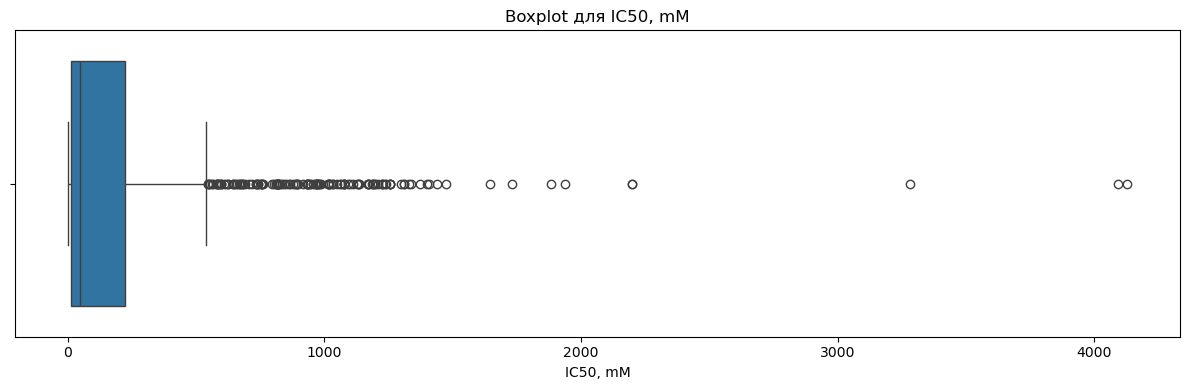

In [95]:
plt.figure(figsize=(12, 4))

sns.boxplot(x=df[target])

plt.title(f'Boxplot для {target}')
plt.tight_layout()
plt.show()

In [96]:
mean = df[target].mean()
std = df[target].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

outliers = df[(df[target] < lower_bound) | (df[target] > upper_bound)]

print("Выбросы по правилу 3 сигм:")
outliers

Выбросы по правилу 3 сигм:


,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,IC50_gt_median
28,0.180308,-0.605721,0.040886,-0.782286,-1.478479,-0.947630,1.696257,0.656297,1.902881,0.617681,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,1472.457163,2191.156492,1.488095,1
29,0.185435,-0.500113,-0.327431,-0.388978,-1.315025,-0.821635,1.696257,0.656297,1.747026,0.619797,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,4095.188563,4095.188563,1.000000,1
30,0.206989,-0.542082,0.045345,-0.616549,-1.472256,-0.837165,1.696257,0.656297,2.006784,0.617690,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,4128.529377,4128.529377,1.000000,1
31,0.212116,-0.677578,-0.303158,-0.186890,-1.318782,-0.711171,1.696257,0.656297,1.853985,0.619806,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,1936.355856,1936.355856,1.000000,1
84,0.296322,-1.030623,0.603592,-0.285638,1.358340,-1.545792,-0.708385,1.434863,0.920526,-0.485829,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,2200.501846,3284.331113,1.492537,1
85,0.296322,-1.030623,0.603592,-0.285638,1.358340,-1.545792,-0.708385,1.434863,0.920526,-0.485829,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,2200.501846,3284.331113,1.492537,1
97,0.224686,-0.920900,0.623981,-0.285638,1.358340,-1.545792,-0.747121,1.427159,0.920526,-0.485922,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,1646.106754,3284.331113,1.995211,1
98,0.296322,-1.030623,0.603592,-0.285638,1.358340,-1.545792,-0.708385,1.434863,0.920526,-0.485829,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,3284.331113,3284.331113,1.000000,1
268,0.053549,-0.245556,0.520230,-0.110489,-0.822042,-1.380612,0.648422,-0.758406,1.487269,-0.458835,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,1731.961620,981.444918,0.566667,1
269,-0.016304,-0.039826,0.498385,-0.341997,-0.771418,-1.491076,0.646370,-0.798259,1.676183,-0.459435,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,1884.576002,1884.576002,1.000000,1


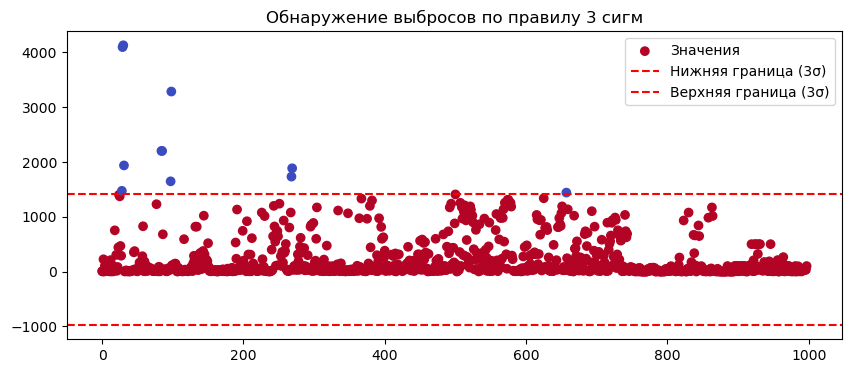

In [97]:
df['is_outlier_3σ'] = (df[target] < lower_bound) | (df[target] > upper_bound)

plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_3σ'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (3σ)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (3σ)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

In [98]:
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["is_outlier_IQR"] = (df[target] < lower_bound) | (df[target] > upper_bound)
df[(df[target] < lower_bound) | (df[target] > upper_bound)]

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,IC50_gt_median,is_outlier_3σ,is_outlier_IQR
18,0.418654,-1.014327,-1.824151,0.747840,0.145026,0.397119,0.567488,-0.966408,0.528165,0.863280,...,-0.234453,-0.274647,-0.168855,-0.084045,751.968277,751.968277,1.000000,1,False,True
24,0.067153,-0.246047,0.008877,1.032462,0.341564,0.125317,-0.254879,-1.122878,-0.111238,-0.458838,...,-0.234453,-0.274647,-0.168855,-0.084045,1400.218964,1371.956657,0.979816,1,False,True
25,0.067153,-0.246047,0.008877,1.032462,0.341564,0.125317,-0.254879,-1.122878,-0.111238,-0.458838,...,-0.234453,-0.274647,-0.168855,-0.084045,1371.956657,1371.956657,1.000000,1,False,True
28,0.180308,-0.605721,0.040886,-0.782286,-1.478479,-0.947630,1.696257,0.656297,1.902881,0.617681,...,-0.234453,-0.274647,-0.168855,-0.084045,1472.457163,2191.156492,1.488095,1,True,True
29,0.185435,-0.500113,-0.327431,-0.388978,-1.315025,-0.821635,1.696257,0.656297,1.747026,0.619797,...,-0.234453,-0.274647,-0.168855,-0.084045,4095.188563,4095.188563,1.000000,1,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,0.817441,-0.539995,-0.576190,-1.990273,0.311328,1.937257,0.022288,-1.323881,-1.382431,-0.444603,...,-0.234453,-0.274647,-0.168855,-0.084045,840.999040,630.749280,0.750000,1,False,True
845,1.007047,-1.061210,-0.631968,-2.304341,0.494763,3.340131,0.022289,-1.320088,-1.745267,-0.443616,...,-0.234453,-0.274647,-0.168855,-0.084045,647.103436,417.381716,0.645000,1,False,True
858,0.053549,-0.245556,0.520230,-0.110489,-0.822042,-1.380612,0.648422,-0.758406,1.487269,-0.458835,...,-0.234453,-0.274647,-0.168855,-0.084045,982.674611,1734.057293,1.764630,1,False,True
863,0.119000,1.109269,0.376369,0.505046,-1.494951,-0.521570,0.772573,-1.176249,-0.590790,-0.462571,...,-0.234453,-0.274647,-0.168855,-0.084045,1170.004145,1170.004145,1.000000,1,False,True


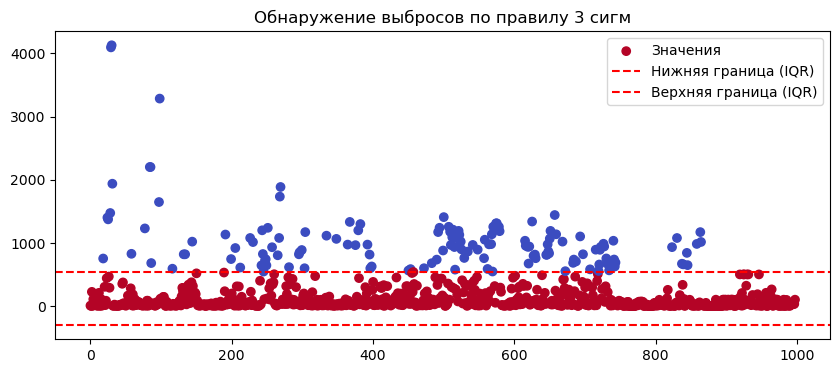

In [99]:
plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_IQR'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (IQR)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (IQR)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

Очистка выбросов по межквартильному размаху слишком сильно снизит число обучающего материала. Отбросим выбросы по правилу 3 sigma

In [100]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,IC50_gt_median,is_outlier_3σ,is_outlier_IQR
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.234453,-0.274647,2.297254,-0.084045,6.239374,175.482382,28.125000,0,False,False
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.234453,-0.274647,2.297254,-0.084045,0.771831,5.402819,7.000000,0,False,False
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,-0.234453,-0.274647,2.297254,-0.084045,223.808778,161.142320,0.720000,1,False,False
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.234453,-0.274647,3.119291,-0.084045,1.705624,107.855654,63.235294,0,False,False
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.234453,-0.274647,-0.168855,-0.084045,107.131532,139.270991,1.300000,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.234453,-0.274647,-0.168855,-0.084045,31.000104,34.999650,1.129017,0,False,False
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.234453,-0.274647,-0.168855,-0.084045,31.999934,33.999415,1.062484,0,False,False
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.234453,-0.274647,-0.168855,-0.084045,30.999883,33.999458,1.096761,0,False,False
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.234453,-0.274647,-0.168855,-0.084045,31.998959,32.999644,1.031272,0,False,False


In [101]:
target_old = target
target = "IC50_gt_median"

In [102]:
# data_cleaned_IQR = df[~df['is_outlier_IQR']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ'])
data_cleaned_IQR = df[~df['is_outlier_3σ']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ', target_old])

data_cleaned_IQR

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"CC50, mM",SI,IC50_gt_median
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,175.482382,28.125000,0
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,5.402819,7.000000,0
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,161.142320,0.720000,1
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,3.119291,-0.084045,107.855654,63.235294,0
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,139.270991,1.300000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,34.999650,1.129017,0
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,33.999415,1.062484,0
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,33.999458,1.096761,0
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,32.999644,1.031272,0


In [103]:
X = data_cleaned_IQR[data_cleaned_IQR.columns[:-3]]
y_ic50 = data_cleaned_IQR[target]

In [104]:
X

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,6.406778,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,3.119291,-0.084045
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.181542,3.676931,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045


In [105]:
y_ic50

0      0
1      0
2      1
3      0
4      1
      ..
993    0
994    0
995    0
996    0
997    1
Name: IC50_gt_median, Length: 987, dtype: int64

In [106]:
X_train, X_test, y_train_ic50, y_test_ic50 = train_test_split(
    X, y_ic50, test_size=0.15, random_state=42
)

In [112]:
class_ratio = np.mean(y_train_ic50)
print(f"Баланс классов: {class_ratio:.2f} / {1-class_ratio:.2f}")

Баланс классов: 0.50 / 0.50


## Инициализация моделей и метрик

In [107]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import (roc_auc_score, f1_score, precision_score, 
                             recall_score, confusion_matrix, roc_curve)
import numpy as np

In [108]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [ ]:
MODELS = {
    'logreg': LogisticRegression(random_state=RANDOM_STATE),
    'rf': RandomForestClassifier(random_state=RANDOM_STATE),
    'xgb': XGBClassifier(random_state=RANDOM_STATE),
}

metrics = {
    'ROC-AUC': roc_auc_score,
    'F1': lambda y_true, y_pred: f1_score(y_true, y_pred, average='binary'),
    'PRECISION': lambda y_true, y_pred: precision_score(y_true, y_pred, average='binary'),
    'RECALL': lambda y_true, y_pred: recall_score(y_true, y_pred, average='binary')
}

## Бейзлайн

Проверим перечисленные модели

In [ ]:
results = []

for name, model in MODELS.items():
    cv_scores = cross_val_score(model, X_train, y_train_ic50,
                               cv=5, scoring='roc_auc', n_jobs=-1)
    
    model.fit(X_train, y_train_ic50)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    model_metrics = {}
    for metric_name, metric_func in metrics.items():
        if metric_name == 'ROC-AUC':
            model_metrics[metric_name] = metric_func(y_test_ic50, y_proba)
        else:
            model_metrics[metric_name] = metric_func(y_test_ic50, y_pred)
    
    results.append({
        'model': name,
        'cv_mean_roc_auc': np.mean(cv_scores),
        'cv_std_roc_auc': np.std(cv_scores),
        **model_metrics
    })

results_df = pd.DataFrame(results)
print(results_df)

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

    model  cv_mean_roc_auc  cv_std_roc_auc   ROC-AUC        F1  PRECISION  \
0  logreg         0.744187        0.021862  0.764040  0.690141   0.671233   
1      rf         0.780919        0.026976  0.777989  0.690647   0.685714   
2     xgb         0.768446        0.025388  0.776178  0.676471   0.686567   

     RECALL  
0  0.710145  
1  0.695652  
2  0.666667  


Как видно, деревья и SVR дают лучшие результаты.

Попробуем оптимизировать их с помощью подбора гиперпараметров

## Оптимизация

Будем оптимизировать при помощи Optuna

In [118]:
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [119]:
N_TRIALS_LR = 100
CV_FOLDS_LR = 10

N_TRIALS_RF = 100
CV_FOLDS_RF = 10

N_TRIALS_XGB = 100
CV_FOLDS_XGB = 10

N_TRIALS_SVR = 30
CV_FOLDS_SVR = 5

### LogisticRegression

In [120]:
def optimize_lr(trial):
    params = {
        'C': trial.suggest_float('C', 0.01, 100, log=True),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'solver': 'saga',
        'max_iter': 1000,
        'random_state': RANDOM_STATE
    }
    model = LogisticRegression(**params)
    return cross_val_score(
        model, X_train, y_train_ic50, cv=CV_FOLDS_LR, scoring='roc_auc', n_jobs=-1
    ).mean()

In [121]:
study_lr = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=RANDOM_STATE)
        )
study_lr.optimize(optimize_lr, n_trials=N_TRIALS_LR, n_jobs=1)

[I 2025-06-02 16:45:29,480] A new study created in memory with name: no-name-8c1c39e2-9869-4f56-8d48-76aa6040f162
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-06-02 16:45:31,066] Trial 0 finished with value: 0.7472471102262043 and parameters: {'C': 0.3148911647956863, 'penalty': 'l1'}. Best is trial 0 with value: 0.7472471102262043.
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max

In [125]:
print(f"Лучшие параметры для Logistic Regression:")
print(study_lr.best_params)
print(f"Лучший ROC-AUC: {study_lr.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_lr)
fig.show()

fig = optuna.visualization.plot_param_importances(study_lr)
fig.show()

Лучшие параметры для Logistic Regression:
{'C': 0.7384138129556825, 'penalty': 'l1'}
Лучший ROC-AUC: 0.7523


In [126]:
best_params_lr = study_lr.best_params
best_params_lr.update({
    'solver': 'saga',
    'max_iter': 1000,
    'random_state': RANDOM_STATE
})
best_lr_model = LogisticRegression(**best_params_lr)

In [127]:
best_lr_model.fit(X_train, y_train_ic50)
y_proba_lr = best_lr_model.predict_proba(X_test)[:, 1]
y_pred_lr = best_lr_model.predict(X_test)

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [130]:
final_metrics_lr = {
    'roc_auc': roc_auc_score(y_test_ic50, y_proba_lr),
    'f1': f1_score(y_test_ic50, y_pred_lr),
    'precision': precision_score(y_test_ic50, y_pred_lr),
    'recall': recall_score(y_test_ic50, y_pred_lr),
    'accuracy': (y_pred_lr == y_test_ic50).mean()
}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_lr.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
roc_auc: 0.7849
f1: 0.7222
precision: 0.6933
recall: 0.7536
accuracy: 0.7315


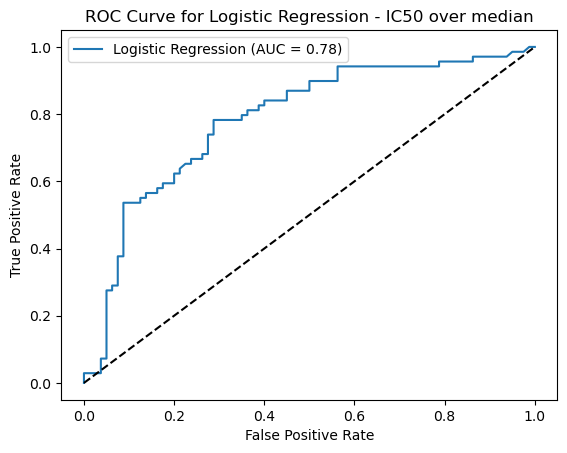

In [132]:
fpr, tpr, _ = roc_curve(y_test_ic50, y_proba_lr)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {final_metrics_lr["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Logistic Regression - IC50 over median')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix: Logistic Regression - IC50 over median')

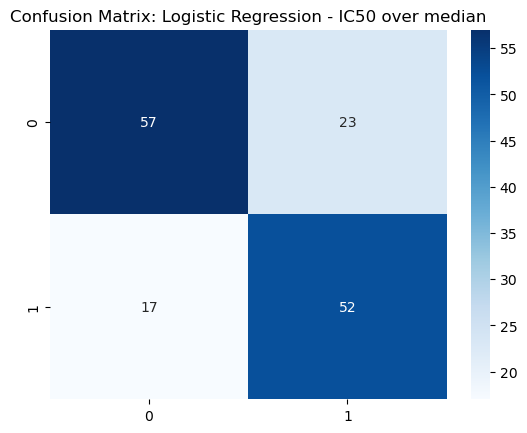

In [133]:
cm = confusion_matrix(y_test_ic50, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: Logistic Regression - IC50 over median')

In [134]:
if hasattr(best_lr_model, 'feature_importances_'):
    importances = best_lr_model.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    top_features = min(20, X.shape[1])
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), X.columns[sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title(f'Top Features: Logistic Regression - IC50 over median')
    plt.tight_layout()

### Random Forest

In [135]:
def optimize_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': True,
        'random_state': RANDOM_STATE,
        'n_jobs': -1
    }
    model = RandomForestClassifier(**params)
    return cross_val_score(
        model, X_train, y_train_ic50, cv=CV_FOLDS_RF, scoring='roc_auc', n_jobs=-1
    ).mean()

In [136]:
study_rf = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=RANDOM_STATE)
        )
study_rf.optimize(optimize_rf, n_trials=N_TRIALS_RF, n_jobs=1)

[I 2025-06-03 13:25:42,097] A new study created in memory with name: no-name-c9b9b50b-949f-4d9c-a601-c58ab22138d4
[I 2025-06-03 13:25:46,976] Trial 0 finished with value: 0.7941568497317626 and parameters: {'n_estimators': 437, 'max_depth': 29, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7941568497317626.
[I 2025-06-03 13:25:47,421] Trial 1 finished with value: 0.7891419169293734 and parameters: {'n_estimators': 152, 'max_depth': 27, 'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.7941568497317626.
[I 2025-06-03 13:25:49,267] Trial 2 finished with value: 0.7967963608207511 and parameters: {'n_estimators': 850, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 2 with value: 0.7967963608207511.
[I 2025-06-03 13:25:50,456] Trial 3 finished with value: 0.7942066257397269 and parameters: {'n_estimators': 489, 'max_depth': 12, 

In [137]:
print(f"Лучшие параметры для Random Forest:")
print(study_rf.best_params)
print(f"Лучший ROC-AUC: {study_rf.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_rf)
fig.show()

fig = optuna.visualization.plot_param_importances(study_rf)
fig.show()

Лучшие параметры для Random Forest:
{'n_estimators': 213, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Лучший ROC-AUC: 0.7988


In [139]:
best_params_rf = study_rf.best_params
best_rf_model = RandomForestClassifier(**best_params_rf)

In [140]:
best_rf_model.fit(X_train, y_train_ic50)
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = best_rf_model.predict(X_test)

In [155]:
final_metrics_rf = {
    'roc_auc': roc_auc_score(y_test_ic50, y_proba_rf),
    'f1': f1_score(y_test_ic50, y_pred_rf),
    'precision': precision_score(y_test_ic50, y_pred_rf),
    'recall': recall_score(y_test_ic50, y_pred_rf),
    'accuracy': (y_pred_rf == y_test_ic50).mean()
}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_rf.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
roc_auc: 0.7898
f1: 0.6857
precision: 0.6761
recall: 0.6957
accuracy: 0.7047


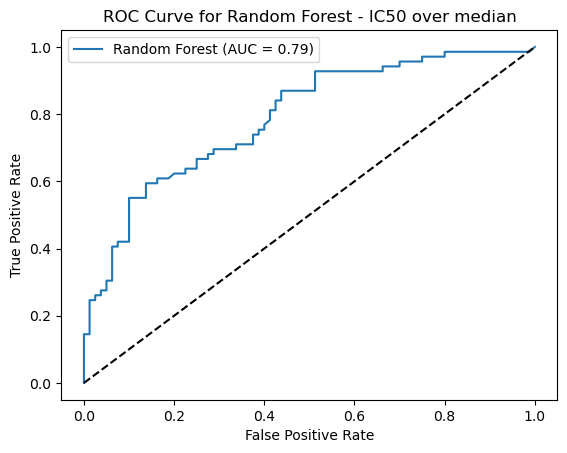

In [156]:
fpr, tpr, _ = roc_curve(y_test_ic50, y_proba_rf)
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {final_metrics_rf["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Random Forest - IC50 over median')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix: Random Forest - IC50 over median')

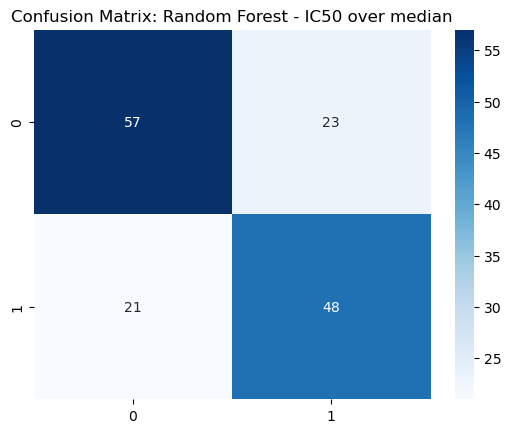

In [157]:
cm = confusion_matrix(y_test_ic50, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: Random Forest - IC50 over median')

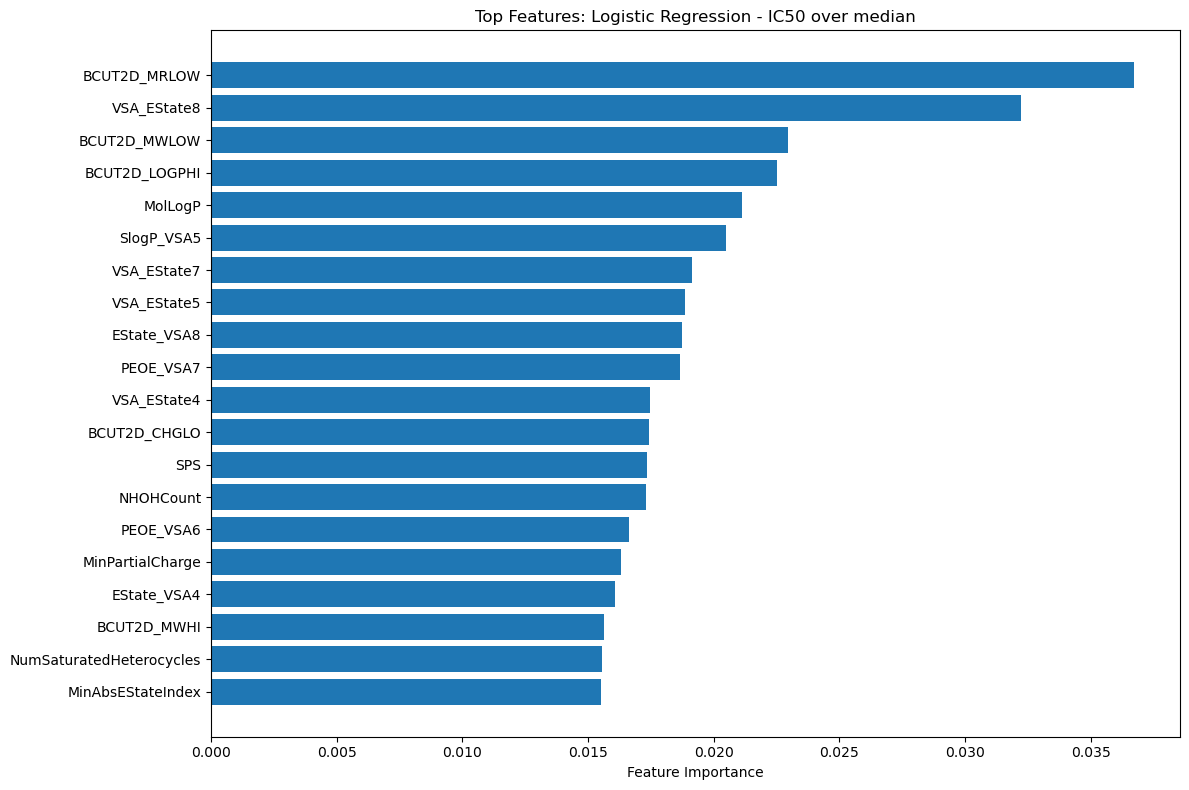

In [158]:
if hasattr(best_rf_model, 'feature_importances_'):
    importances = best_rf_model.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    top_features = min(20, X.shape[1])
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), X.columns[sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title(f'Top Features: Logistic Regression - IC50 over median')
    plt.tight_layout()

### XGBoost

In [147]:
def optimize_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'use_label_encoder': False,
        'eval_metric': 'auc',
        'random_state': RANDOM_STATE
    }
    model = XGBClassifier(**params)
    return cross_val_score(
        model, X_train, y_train_ic50, cv=CV_FOLDS_XGB, scoring='roc_auc', n_jobs=-1
    ).mean()

In [148]:
study_xgb = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=RANDOM_STATE)
        )
study_xgb.optimize(optimize_xgb, n_trials=N_TRIALS_RF, n_jobs=1)

[I 2025-06-03 13:34:07,838] A new study created in memory with name: no-name-a4f2c7a6-cb11-45ac-b581-734164b98b2a
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:34:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:34:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:34:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterat

In [149]:
print(f"Лучшие параметры для XGBoost:")
print(study_xgb.best_params)
print(f"Лучший ROC-AUC: {study_xgb.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_xgb)
fig.show()

fig = optuna.visualization.plot_param_importances(study_xgb)
fig.show()

Лучшие параметры для XGBoost:
{'n_estimators': 923, 'max_depth': 9, 'learning_rate': 0.013318988529295596, 'subsample': 0.902327344008856, 'colsample_bytree': 0.7567147226729338, 'gamma': 0.3501804624467372, 'reg_alpha': 2.709977284843716, 'reg_lambda': 2.177391143829299}
Лучший ROC-AUC: 0.7944


In [150]:
best_params_xgb = study_xgb.best_params
best_xgb_model = XGBClassifier(**best_params_xgb)

In [151]:
best_xgb_model.fit(X_train, y_train_ic50)
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = best_xgb_model.predict(X_test)

In [152]:
final_metrics_xgb = {
    'roc_auc': roc_auc_score(y_test_ic50, y_proba_xgb),
    'f1': f1_score(y_test_ic50, y_pred_xgb),
    'precision': precision_score(y_test_ic50, y_pred_xgb),
    'recall': recall_score(y_test_ic50, y_pred_xgb),
    'accuracy': (y_pred_xgb == y_test_ic50).mean()
}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_rf.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
roc_auc: 0.7898
f1: 0.6857
precision: 0.6761
recall: 0.7536
accuracy: 0.7047


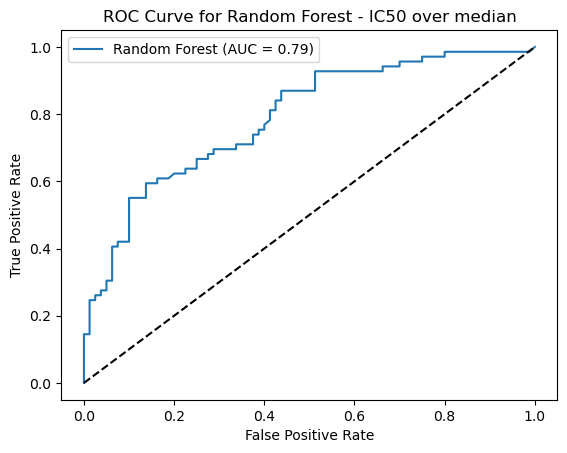

In [ ]:
fpr, tpr, _ = roc_curve(y_test_ic50, y_proba_rf)
plt.figure()
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {final_metrics_rf["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for XGBoost - IC50 over median')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix: Random Forest - IC50 over median')

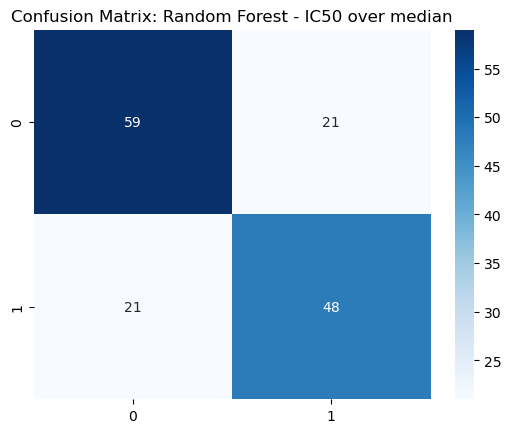

In [153]:
cm = confusion_matrix(y_test_ic50, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: Random Forest - IC50 over median')

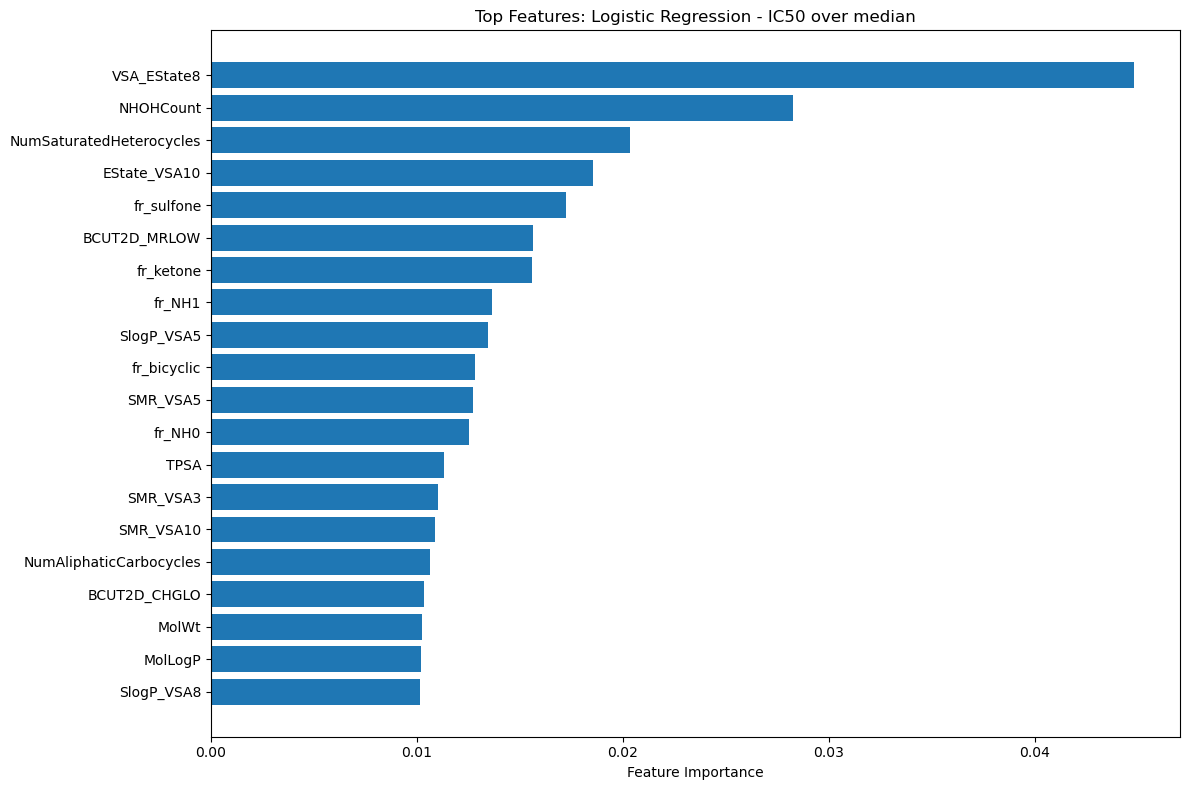

In [154]:
if hasattr(best_xgb_model, 'feature_importances_'):
    importances = best_xgb_model.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    top_features = min(20, X.shape[1])
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), X.columns[sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title(f'Top Features: Logistic Regression - IC50 over median')
    plt.tight_layout()

## Сравнение моделей

In [ ]:
metrics_comparisson = {
    "LR": final_metrics_lr,
    "RF": final_metrics_rf,
    "XGB": final_metrics_xgb,
}

df_metrics = pd.DataFrame(metrics_comparisson)

In [160]:
df_metrics

,LR,RF,XGB
roc_auc,0.784873,0.789764,0.792120
f1,0.722222,0.685714,0.695652
precision,0.693333,0.676056,0.695652
recall,0.753623,0.695652,0.695652
accuracy,0.731544,0.704698,0.718121


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Th

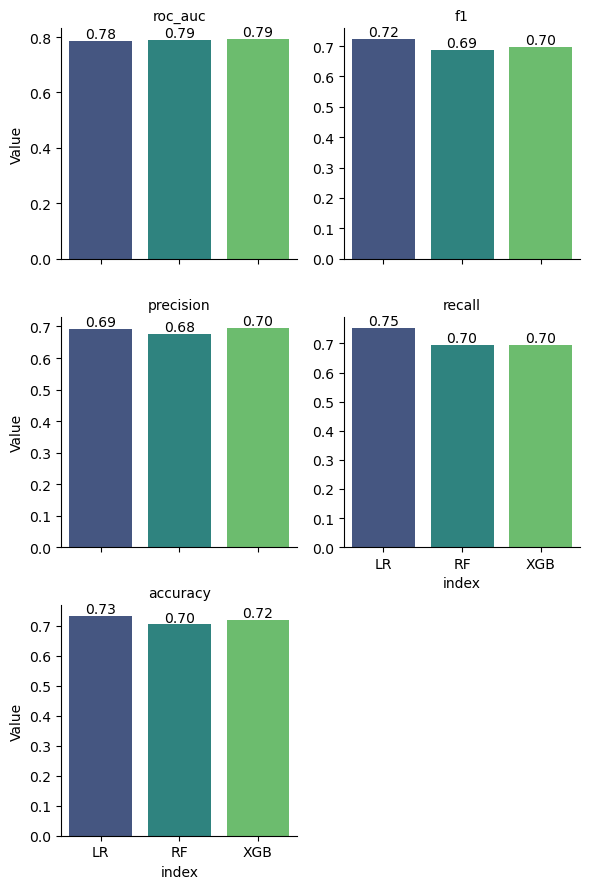

In [161]:
plot_data = df_metrics.T.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')

palette = sns.color_palette("viridis", n_colors=len(plot_data['index'].unique()))

g = sns.FacetGrid(plot_data, col="Metric", col_wrap=2, sharey=False)
g.map_dataframe(sns.barplot, x="index", y="Value", palette=palette, ci=None)
g.set_titles("{col_name}")

for ax in g.axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

g.tight_layout()
plt.show()

Как видно, модель LR в совокупности даёт лучшие результаты